In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib
import re


In [2]:
dos_df = pd.read_csv('/kaggle/input/car-hacking-dataset/DoS_dataset.csv')
dos_df.columns = ['Timestamp', 'CAN ID', 'DLC', 'DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7', 'Flag']
dos_df.head()

,Timestamp,CAN ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
0,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R
1,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,3a,R
2,1.478198e+09,02a0,8,64,00,9a,1d,97,02,bd,00,R
3,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R
4,1.478198e+09,0545,8,d8,00,00,8a,00,00,00,00,R


In [3]:
dos_df.nunique()

Timestamp    3665770
CAN ID            27
DLC                2
DATA0            108
DATA1             71
DATA2             76
DATA3             26
DATA4            190
DATA5            256
DATA6             75
DATA7            256
Flag               2
dtype: int64

In [4]:
df_2 = dos_df.copy()
df_2.drop('Timestamp', axis=1, inplace=True)
df_2.head()

,CAN ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
0,018f,8,fe,5b,00,00,00,3c,00,00,R
1,0260,8,19,21,22,30,08,8e,6d,3a,R
2,02a0,8,64,00,9a,1d,97,02,bd,00,R
3,0329,8,40,bb,7f,14,11,20,00,14,R
4,0545,8,d8,00,00,8a,00,00,00,00,R


In [5]:
missing_values = df_2.isnull().sum()
missing_values

CAN ID        0
DLC           0
DATA0         0
DATA1         0
DATA2         0
DATA3     31188
DATA4     31188
DATA5     31188
DATA6     31188
DATA7     31188
Flag      31188
dtype: int64

In [6]:
df_dlc_is_2 = df_2[df_2["DLC"] == 2].copy()
df_dlc_is_2.head(), df_dlc_is_2.shape

(    CAN ID  DLC DATA0 DATA1 DATA2 DATA3 DATA4 DATA5 DATA6 DATA7 Flag
 35    05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 134   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 226   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 319   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 411   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN,
 (31188, 11))

In [7]:
df_d2_nan = df_2[df_2["DATA2"] == 'R'].copy()
df_d2_nan.head(), df_d2_nan.shape

(    CAN ID  DLC DATA0 DATA1 DATA2 DATA3 DATA4 DATA5 DATA6 DATA7 Flag
 35    05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 134   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 226   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 319   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 411   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN,
 (31188, 11))

In [8]:
df_flag_nan = df_2[(df_2["Flag"] != "T") & (df_2["Flag"] != "R")]
df_flag_nan.head(10), df_flag_nan.shape

(    CAN ID  DLC DATA0 DATA1 DATA2 DATA3 DATA4 DATA5 DATA6 DATA7 Flag
 35    05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 134   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 226   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 319   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 411   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 504   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 596   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 689   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 781   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 874   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN,
 (31188, 11))

In [9]:
df_3 = df_2.copy()

In [10]:
# For rows with DLC=2, move 'R' from DATA2 to Flag
mask = df_3["DLC"] == 2
df_3.loc[mask, "Flag"] = df_3.loc[mask, "DATA2"]  # Copy 'R' to Flag
df_3.loc[mask, "DATA2"] = np.nan  # Set DATA2 to NaN for DLC=2



# Verify alignment
print(df_3[df_3["DLC"] == 2].head())

    CAN ID  DLC DATA0 DATA1 DATA2 DATA3 DATA4 DATA5 DATA6 DATA7 Flag
35    05f0    2    01    00   NaN   NaN   NaN   NaN   NaN   NaN    R
134   05f0    2    01    00   NaN   NaN   NaN   NaN   NaN   NaN    R
226   05f0    2    01    00   NaN   NaN   NaN   NaN   NaN   NaN    R
319   05f0    2    01    00   NaN   NaN   NaN   NaN   NaN   NaN    R
411   05f0    2    01    00   NaN   NaN   NaN   NaN   NaN   NaN    R


In [11]:
df_4 = df_3.copy()

In [12]:
# Fill NaN with hex 00
default_hex = '00'
data_columns = ['DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7', 'Flag']
df_4[data_columns] = df_4[data_columns].fillna(default_hex)
print(df_4[df_4["DLC"] == 2].head()), df_4[df_4["DLC"] == 2].shape

    CAN ID  DLC DATA0 DATA1 DATA2 DATA3 DATA4 DATA5 DATA6 DATA7 Flag
35    05f0    2    01    00    00    00    00    00    00    00    R
134   05f0    2    01    00    00    00    00    00    00    00    R
226   05f0    2    01    00    00    00    00    00    00    00    R
319   05f0    2    01    00    00    00    00    00    00    00    R
411   05f0    2    01    00    00    00    00    00    00    00    R


(None, (31188, 11))

In [13]:
df_4.head(), df_4.shape

(  CAN ID  DLC DATA0 DATA1 DATA2 DATA3 DATA4 DATA5 DATA6 DATA7 Flag
 0   018f    8    fe    5b    00    00    00    3c    00    00    R
 1   0260    8    19    21    22    30    08    8e    6d    3a    R
 2   02a0    8    64    00    9a    1d    97    02    bd    00    R
 3   0329    8    40    bb    7f    14    11    20    00    14    R
 4   0545    8    d8    00    00    8a    00    00    00    00    R,
 (3665770, 11))

In [14]:
df_4[(df_4["Flag"] != "T") & (df_4["Flag"] != "R")]


,CAN ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag


In [15]:
df_4[df_4["DATA2"] == 'R'].head()

,CAN ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag


In [16]:
# Drop unnecessary columns
df_drop_dlc = df_4.drop(["DLC"], axis=1).copy()
df_drop_dlc.head()

,CAN ID,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
0,018f,fe,5b,00,00,00,3c,00,00,R
1,0260,19,21,22,30,08,8e,6d,3a,R
2,02a0,64,00,9a,1d,97,02,bd,00,R
3,0329,40,bb,7f,14,11,20,00,14,R
4,0545,d8,00,00,8a,00,00,00,00,R


In [17]:
df_drop_dlc.dtypes, df_drop_dlc.shape

(CAN ID    object
 DATA0     object
 DATA1     object
 DATA2     object
 DATA3     object
 DATA4     object
 DATA5     object
 DATA6     object
 DATA7     object
 Flag      object
 dtype: object,
 (3665770, 10))

In [18]:
df_can_id_0000 = df_drop_dlc[df_drop_dlc["CAN ID"] == "0000"]
df_can_id_0000.head(), df_can_id_0000.shape

(     CAN ID DATA0 DATA1 DATA2 DATA3 DATA4 DATA5 DATA6 DATA7 Flag
 1475   0000    00    00    00    00    00    00    00    00    T
 1477   0000    00    00    00    00    00    00    00    00    T
 1479   0000    00    00    00    00    00    00    00    00    T
 1481   0000    00    00    00    00    00    00    00    00    T
 1483   0000    00    00    00    00    00    00    00    00    T,
 (587521, 10))

In [19]:
df_6 = df_drop_dlc.copy()
df_6.describe()

,CAN ID,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
count,3665770,3665770,3665770,3665770,3665770,3665770,3665770,3665770,3665770,3665770
unique,27,108,71,75,26,190,256,75,256,2
top,0000,00,00,00,00,00,00,00,00,R
freq,587521,1623283,1850549,2391587,1989884,1973752,1595567,2266679,2171246,3078249


In [20]:
data_columns = ['DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7']

# Create regex pattern for valid hex
hex_pattern = r'^[0-9A-Fa-f]{2}$'

# Check for non-hex values
mask = df_6[data_columns].apply(lambda col: ~col.str.match(hex_pattern, na=False))

# Get rows with any invalid entries
invalid_rows = df_6[mask.any(axis=1)]

print("Rows with non-hex values in DATA columns:")
print(invalid_rows if not invalid_rows.empty else "No non-hex values found")

Rows with non-hex values in DATA columns:
No non-hex values found


In [21]:
df_7 = df_6.copy()
# Function to convert hex to decimal
def hex_to_int(hex_str: str) -> int:
    try:
        return int(str(hex_str).strip(), 16)  # Convert hex to int
    except ValueError:
        return np.nan 

# Convert all DATA columns
for col in df_7.columns[:-1]:  # Exclude 'Flag' column
    df_7[col] = df_7[col].apply(hex_to_int)

df_7.head()

,CAN ID,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
0,399,254,91,0,0,0,60,0,0,R
1,608,25,33,34,48,8,142,109,58,R
2,672,100,0,154,29,151,2,189,0,R
3,809,64,187,127,20,17,32,0,20,R
4,1349,216,0,0,138,0,0,0,0,R


In [22]:
df_8 = df_7.copy()

In [23]:
df_8["Flag"] = df_8["Flag"].map({"R": 0, "T": 1})
df_8.head()

,CAN ID,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
0,399,254,91,0,0,0,60,0,0,0
1,608,25,33,34,48,8,142,109,58,0
2,672,100,0,154,29,151,2,189,0,0
3,809,64,187,127,20,17,32,0,20,0
4,1349,216,0,0,138,0,0,0,0,0


In [24]:
df_8["Flag"].unique()

array([0, 1])

In [25]:
df_8.isna().sum()

CAN ID    0
DATA0     0
DATA1     0
DATA2     0
DATA3     0
DATA4     0
DATA5     0
DATA6     0
DATA7     0
Flag      0
dtype: int64

In [26]:
df_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665770 entries, 0 to 3665769
Data columns (total 10 columns):
 #   Column  Dtype
---  ------  -----
 0   CAN ID  int64
 1   DATA0   int64
 2   DATA1   int64
 3   DATA2   int64
 4   DATA3   int64
 5   DATA4   int64
 6   DATA5   int64
 7   DATA6   int64
 8   DATA7   int64
 9   Flag    int64
dtypes: int64(10)
memory usage: 279.7 MB


In [27]:
df_8.describe()

,CAN ID,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
count,3.665770e+06,3.665770e+06,3.665770e+06,3.665770e+06,3.665770e+06,3.665770e+06,3.665770e+06,3.665770e+06,3.665770e+06,3.665770e+06
mean,5.898021e+02,5.053060e+01,3.742432e+01,3.037550e+01,5.403188e+01,3.888667e+01,5.620259e+01,2.178434e+01,4.054242e+01,1.602722e-01
std,4.309473e+02,8.810461e+01,5.212957e+01,5.307059e+01,8.843757e+01,6.810672e+01,7.704030e+01,5.247999e+01,6.740078e+01,3.668584e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.040000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.080000e+02,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.800000e+02,3.600000e+01,3.900000e+01,3.500000e+01,4.800000e+01,3.500000e+01,1.270000e+02,9.000000e+00,5.700000e+01,0.000000e+00
max,1.680000e+03,2.550000e+02,1.920000e+02,2.520000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.090000e+02,2.550000e+02,1.000000e+00


In [28]:
df_8.to_csv('/kaggle/working/cleaned_data.csv', index=False)

print("Data saved successfully as 'cleaned_data.csv'.")

Data saved successfully as 'cleaned_data.csv'.


In [29]:
# Exclude the 'Flag' column before calculating correlation
correlation_matrix = df_8.corr()
correlation_matrix

,CAN ID,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
CAN ID,1.000000,0.280295,0.025332,0.285694,0.212122,0.339657,0.103898,0.152062,-0.106815,-0.597919
DATA0,0.280295,1.000000,0.265148,-0.084861,-0.118518,0.302947,0.162191,-0.083844,-0.158038,-0.250562
DATA1,0.025332,0.265148,1.000000,0.248555,0.249595,0.001412,0.275357,-0.195221,0.195102,-0.313639
DATA2,0.285694,-0.084861,0.248555,1.000000,0.149292,0.367018,-0.039111,0.308908,0.133593,-0.250051
DATA3,0.212122,-0.118518,0.249595,0.149292,1.000000,0.144452,0.615395,0.020012,0.038851,-0.266915
DATA4,0.339657,0.302947,0.001412,0.367018,0.144452,1.000000,0.351487,0.192900,0.019239,-0.249443
DATA5,0.103898,0.162191,0.275357,-0.039111,0.615395,0.351487,1.000000,0.066449,-0.032675,-0.318712
DATA6,0.152062,-0.083844,-0.195221,0.308908,0.020012,0.192900,0.066449,1.000000,-0.078964,-0.181347
DATA7,-0.106815,-0.158038,0.195102,0.133593,0.038851,0.019239,-0.032675,-0.078964,1.000000,-0.262787
Flag,-0.597919,-0.250562,-0.313639,-0.250051,-0.266915,-0.249443,-0.318712,-0.181347,-0.262787,1.000000


<Axes: >

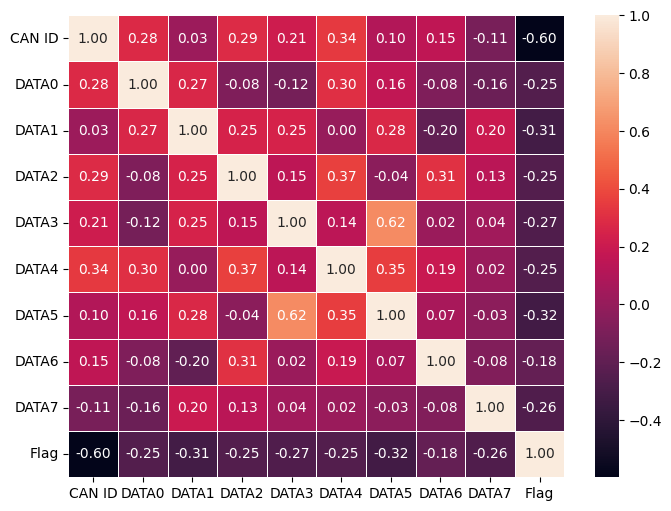

In [30]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)

In [31]:
df_9 = df_8.copy()

In [32]:
import os
import pandas as pd
import numpy as np

# ✅ Detect GPU availability
GPU_AVAILABLE = os.path.exists('/dev/nvidia0')

try:
    if GPU_AVAILABLE:
        import cudf
        import cupy as cp
        from cuml.ensemble import RandomForestClassifier as cuRF
        from cuml.model_selection import train_test_split
        from cuml.preprocessing import StandardScaler as cuScaler
        print("🚀 RAPIDS cuML available! Running on GPU")
    else:
        raise ImportError
except ImportError:
    GPU_AVAILABLE = False
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestClassifier
    print("⚡ RAPIDS not available. Running on CPU.")

# 📌 Load dataset directly to GPU
if GPU_AVAILABLE:
    df_10 = cudf.from_pandas(df_9)
else:
    df_10 = df_9.copy()

# Define features and target
X = df_10.drop(columns=['Flag'])
y = df_10['Flag']

# ✅ Handle class imbalance (GPU-compatible)
if GPU_AVAILABLE:
    # Simplified GPU oversampling (adjust as needed)
    X_1 = X[y == 1]
    X_0 = X[y == 0]
    X_0_resampled = X_0.sample(n=len(X_1), replace=True)
    X_resampled = cudf.concat([X_1, X_0_resampled])
    y_resampled = cudf.Series(cp.concatenate([cp.ones(len(X_1)), cp.zeros(len(X_0_resampled))]))
else:
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

# ✅ Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Convert to float32
if GPU_AVAILABLE:
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')
else:
    X_train = X_train.astype(np.float32)
    X_test = X_test.astype(np.float32)
    y_train = y_train.astype(np.float32)
    y_test = y_test.astype(np.float32)

# ✅ Standardize features
scaler = cuScaler() if GPU_AVAILABLE else StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Choose the model
if GPU_AVAILABLE:
    print("🚀 Using GPU-Accelerated Random Forest (cuML)")
    model = cuRF(n_estimators=100, random_state=42, n_streams=1)
else:
    print("⚡ Using CPU-based Random Forest")
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced", n_jobs=-1)

# ✅ Train the model
model.fit(X_train_scaled, y_train)

# ✅ Predictions and conversion to CPU
if GPU_AVAILABLE:
    y_pred = model.predict(X_test_scaled).to_numpy()
    y_test = y_test.to_numpy()
else:
    y_pred = model.predict(X_test_scaled)

# ✅ Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save model
joblib.dump(model, "rf_model.joblib")


🚀 RAPIDS cuML available! Running on GPU
🚀 Using GPU-Accelerated Random Forest (cuML)
✅ Accuracy: 0.9861111111111112
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    117504
         1.0       0.97      1.00      0.99    117504

    accuracy                           0.99    235008
   macro avg       0.99      0.99      0.99    235008
weighted avg       0.99      0.99      0.99    235008



['rf_model.joblib']

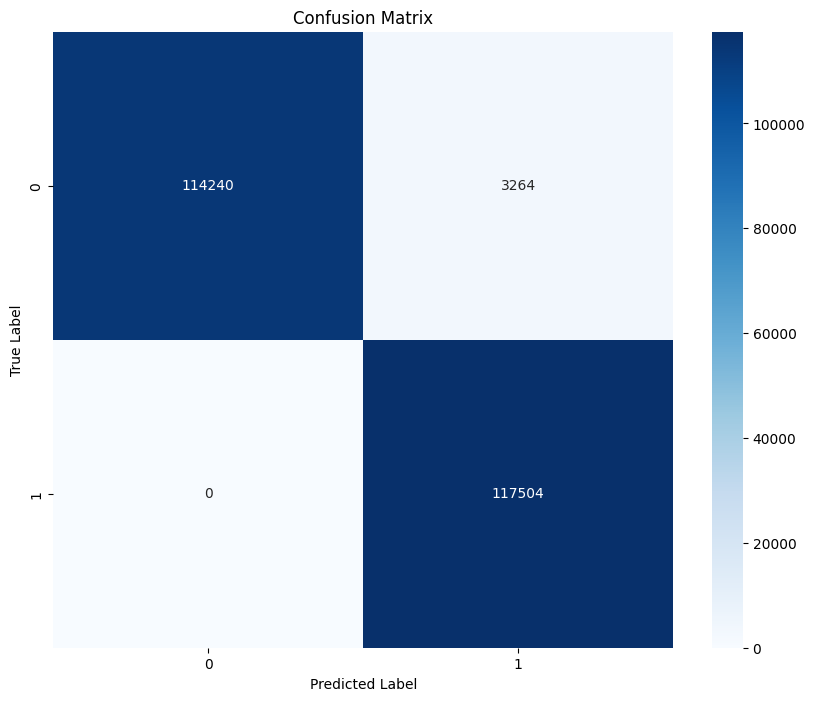

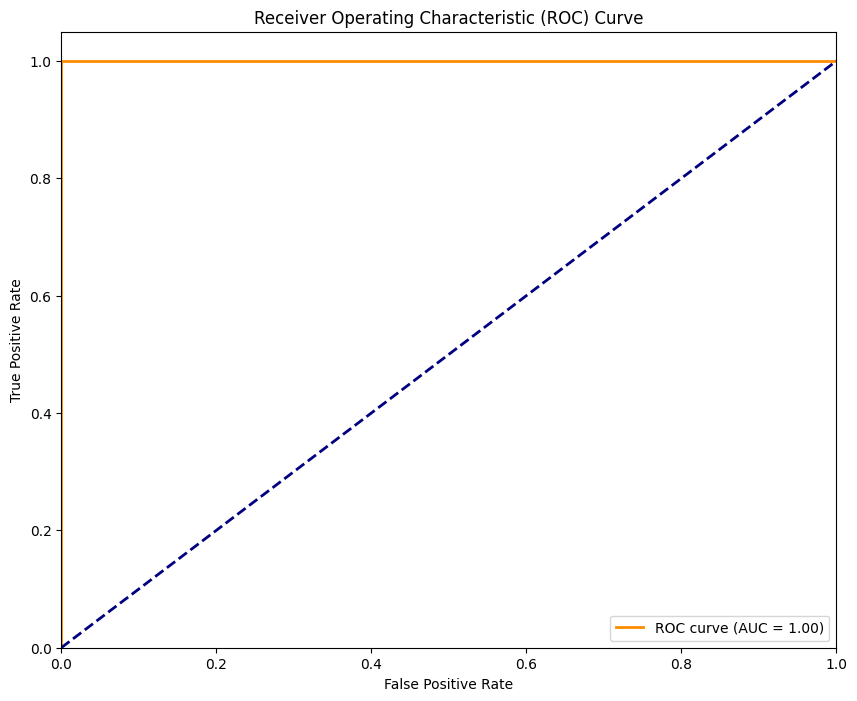

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 1. Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 2. ROC Curve & AUC Score
if GPU_AVAILABLE:
    try:
        y_pred_proba = model.predict_proba(X_test_scaled)
        if isinstance(y_pred_proba, cudf.DataFrame):
            y_pred_proba = y_pred_proba.iloc[:, 1].to_numpy()
        else:
            y_pred_proba = y_pred_proba[:, 1].to_numpy()
    except AttributeError:
        # If predict_proba is not available, use predict
        y_pred_proba = model.predict(X_test_scaled).to_numpy()
else:
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# # 3. Feature Importance Plot
# if GPU_AVAILABLE:
#     feature_importance = model.feature_importances_.to_numpy()
# else:
#     feature_importance = model.feature_importances_

# feature_names = X.columns.to_numpy() if GPU_AVAILABLE else X.columns

# # Sort features by importance
# sorted_idx = np.argsort(feature_importance)
# sorted_features = feature_names[sorted_idx]
# sorted_importance = feature_importance[sorted_idx]

# # Plot top 20 features
# plt.figure(figsize=(12, 8))
# plt.barh(range(20), sorted_importance[-20:])
# plt.yticks(range(20), sorted_features[-20:])
# plt.xlabel('Feature Importance')
# plt.title('Top 20 Most Important Features')
# plt.tight_layout()
# plt.show()


In [34]:
# import cudf
# import cupy as cp
# import numpy as np
# import matplotlib.pyplot as plt
# from cuml.metrics import accuracy_score as cu_accuracy_score

# def permutation_importance(model, X, y, n_repeats=10, random_state=42):
#     cp.random.seed(random_state)
    
#     # Ensure y is a 1D array
#     y = y.squeeze() if isinstance(y, cudf.DataFrame) else y
    
#     # Get initial score
#     y_pred = model.predict(X)
#     y_pred = y_pred.squeeze() if isinstance(y_pred, cudf.DataFrame) else y_pred
#     baseline_score = cu_accuracy_score(y, y_pred)
    
#     importances = []
    
#     for col in X.columns:
#         scores = []
#         for _ in range(n_repeats):
#             # Create a copy and shuffle the feature
#             X_shuffled = X.copy()
#             X_shuffled[col] = X_shuffled[col].sample(frac=1.0, replace=False).reset_index(drop=True)
            
#             # Predict and calculate score
#             y_pred = model.predict(X_shuffled)
#             y_pred = y_pred.squeeze() if isinstance(y_pred, cudf.DataFrame) else y_pred
#             score = cu_accuracy_score(y, y_pred)
            
#             # Calculate importance
#             importance = baseline_score - score
#             scores.append(importance)
        
#         importances.append(np.mean(scores))
    
#     return cudf.Series(importances, index=X.columns)


# # Calculate permutation importance
# feature_importance = permutation_importance(model, X_test_scaled, y_test)

# # Convert to CPU for plotting
# feature_importance_cpu = feature_importance.to_pandas()

# # Sort features by importance
# sorted_idx = feature_importance_cpu.argsort()
# sorted_features = feature_importance_cpu.index[sorted_idx]
# sorted_importance = feature_importance_cpu.values[sorted_idx]

# # Determine the number of features to plot (all features if less than 20, otherwise top 20)
# n_features_to_plot = min(len(sorted_features), 20)

# # Plot features
# plt.figure(figsize=(12, 8))
# plt.barh(range(n_features_to_plot), sorted_importance[-n_features_to_plot:])
# plt.yticks(range(n_features_to_plot), sorted_features[-n_features_to_plot:])
# plt.xlabel('Feature Importance (Decrease in Accuracy)')
# plt.title(f'Top {n_features_to_plot} Most Important Features (Permutation Importance)')
# plt.tight_layout()
# plt.show()

# # Print feature importances
# print("Feature Importances:")
# for feature, importance in feature_importance_cpu.sort_values(ascending=False).items():
#     print(f"{feature}: {importance:.4f}")


In [35]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb

# ✅ Detect GPU availability
GPU_AVAILABLE = os.path.exists('/dev/nvidia0')

try:
    if GPU_AVAILABLE:
        import cudf
        import cupy as cp
        from cuml.model_selection import train_test_split as cuml_train_test_split
        from cuml.preprocessing import StandardScaler as cuScaler
        print("🚀 RAPIDS cuML available! Running on GPU")
    else:
        raise ImportError
except ImportError:
    GPU_AVAILABLE = False
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    print("⚡ RAPIDS not available. Running on CPU.")

# 📌 Load dataset directly to GPU
if GPU_AVAILABLE:
    # Assuming df_9 is already loaded as a pandas DataFrame before this block.
    df_10 = cudf.from_pandas(df_9)
else:
    df_10 = df_9.copy()

# Define features and target
X = df_10.drop(columns=['Flag'])
y = df_10['Flag']

# ✅ Handle class imbalance (GPU-compatible)
if GPU_AVAILABLE:
    X_1 = X[y == 1]
    X_0 = X[y == 0]
    X_0_resampled = X_0.sample(n=len(X_1), replace=True)
    X_resampled = cudf.concat([X_1, X_0_resampled])
    y_resampled = cudf.Series(cp.concatenate([cp.ones(len(X_1)), cp.zeros(len(X_0_resampled))]))
else:
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

# ✅ Convert cudf DataFrame to NumPy arrays for train_test_split if using GPU
if GPU_AVAILABLE:
    X_resampled_cpu = X_resampled.to_pandas().values  # Convert cudf to pandas, then to NumPy
    y_resampled_cpu = y_resampled.to_pandas().values
else:
    X_resampled_cpu = X_resampled
    y_resampled_cpu = y_resampled

# ✅ Split into train/test sets (works for both CPU and GPU)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_cpu, y_resampled_cpu, test_size=0.2, random_state=42, stratify=y_resampled_cpu
)

# ✅ Convert back to cudf DataFrame if GPU is available
if GPU_AVAILABLE:
    X_train = cudf.DataFrame.from_pandas(pd.DataFrame(X_train))  # Convert back to cudf DataFrame
    X_test = cudf.DataFrame.from_pandas(pd.DataFrame(X_test))
    y_train = cudf.Series(y_train)
    y_test = cudf.Series(y_test)

# ✅ Convert to float32
if GPU_AVAILABLE:
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')
else:
    X_train = X_train.astype(np.float32)
    X_test = X_test.astype(np.float32)
    y_train = y_train.astype(np.float32)
    y_test = y_test.astype(np.float32)

# ✅ Standardize features
scaler = cuScaler() if GPU_AVAILABLE else StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert columns to explicit string names (FIX HERE)
if GPU_AVAILABLE:
    # For cuDF
    X_train_scaled.columns = X_train_scaled.columns.astype('str')
    X_test_scaled.columns = X_test_scaled.columns.astype('str')
else:
    # For pandas
    X_train_scaled.columns = X_train_scaled.columns.astype(str)
    X_test_scaled.columns = X_test_scaled.columns.astype(str)


# ✅ Choose the model
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "n_estimators": 100,
    "random_state": 42,
    "device": "cuda"
}

if GPU_AVAILABLE:
    print("🚀 Using GPU-Accelerated XGBoost")
    params["tree_method"] = "hist"  # Enable GPU
else:
    print("⚡ Using CPU-based XGBoost")
    params["tree_method"] = "hist"

model = xgb.XGBClassifier(**params)

# ✅ Train the model
model.fit(X_train_scaled, y_train)

# ✅ Predictions and conversion to CPU if necessary
if GPU_AVAILABLE:
    # Predictions are already in NumPy array format, no need for .to_numpy()
    y_pred = model.predict(X_test_scaled)
    # Only convert y_test if it's a cudf Series
    y_test = y_test.to_numpy()  # Convert cudf to NumPy
else:
    y_pred = model.predict(X_test_scaled)  # No conversion needed here either

# ✅ Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save model
joblib.dump(model, "xgb_model.joblib")


🚀 RAPIDS cuML available! Running on GPU
🚀 Using GPU-Accelerated XGBoost


/usr/local/lib/python3.10/dist-packages/xgboost/data.py:839: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


✅ Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    117504
         1.0       1.00      1.00      1.00    117504

    accuracy                           1.00    235008
   macro avg       1.00      1.00      1.00    235008
weighted avg       1.00      1.00      1.00    235008



/usr/local/lib/python3.10/dist-packages/xgboost/data.py:839: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


['xgb_model.joblib']

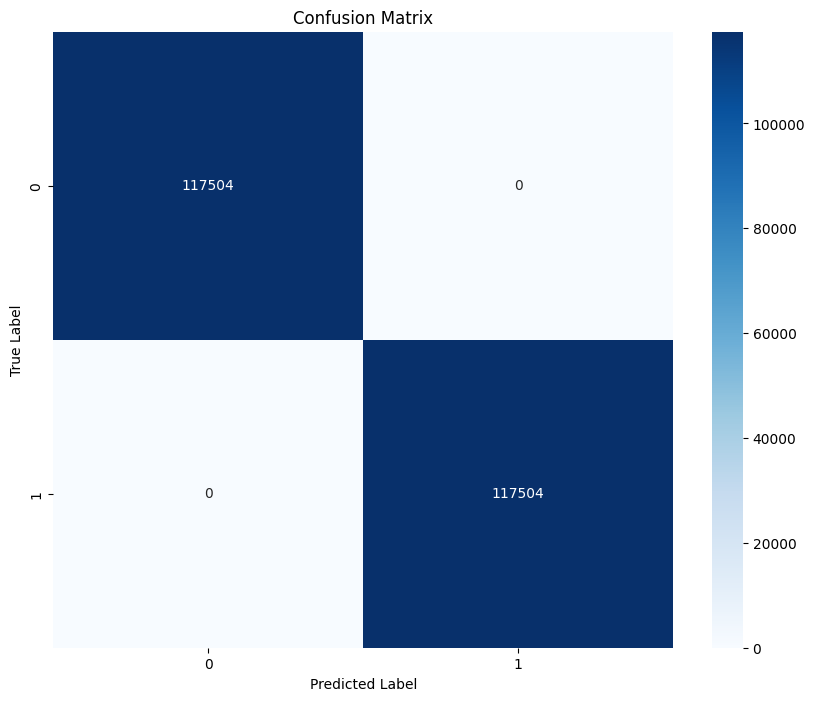

/usr/local/lib/python3.10/dist-packages/xgboost/data.py:839: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  feature_names = data.columns.format()


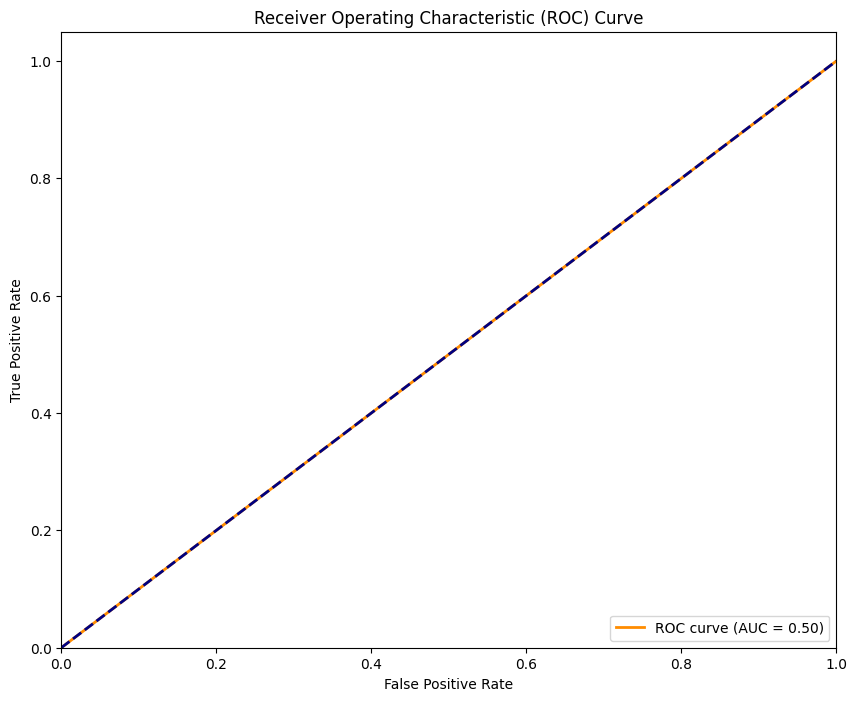

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 1. Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 2. ROC Curve & AUC Score
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# # 3. Feature Importance Plot
# feature_importance = model.feature_importances_
# feature_names = X_train.columns.to_numpy()

# # Sort features by importance
# sorted_idx = np.argsort(feature_importance)
# sorted_features = feature_names[sorted_idx]
# sorted_importance = feature_importance[sorted_idx]

# # Plot top 20 features
# plt.figure(figsize=(12, 8))
# plt.barh(range(20), sorted_importance[-20:])
# plt.yticks(range(20), sorted_features[-20:])
# plt.xlabel('Feature Importance')
# plt.title('Top 20 Most Important Features')
# plt.tight_layout()
# plt.show()
